### 5개의 머신러닝 알고리즘을 이용한 diabates 데이터 회귀 분석


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv(r"C:\Users\DoHyeonjik\Desktop\diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [2]:
print(df.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


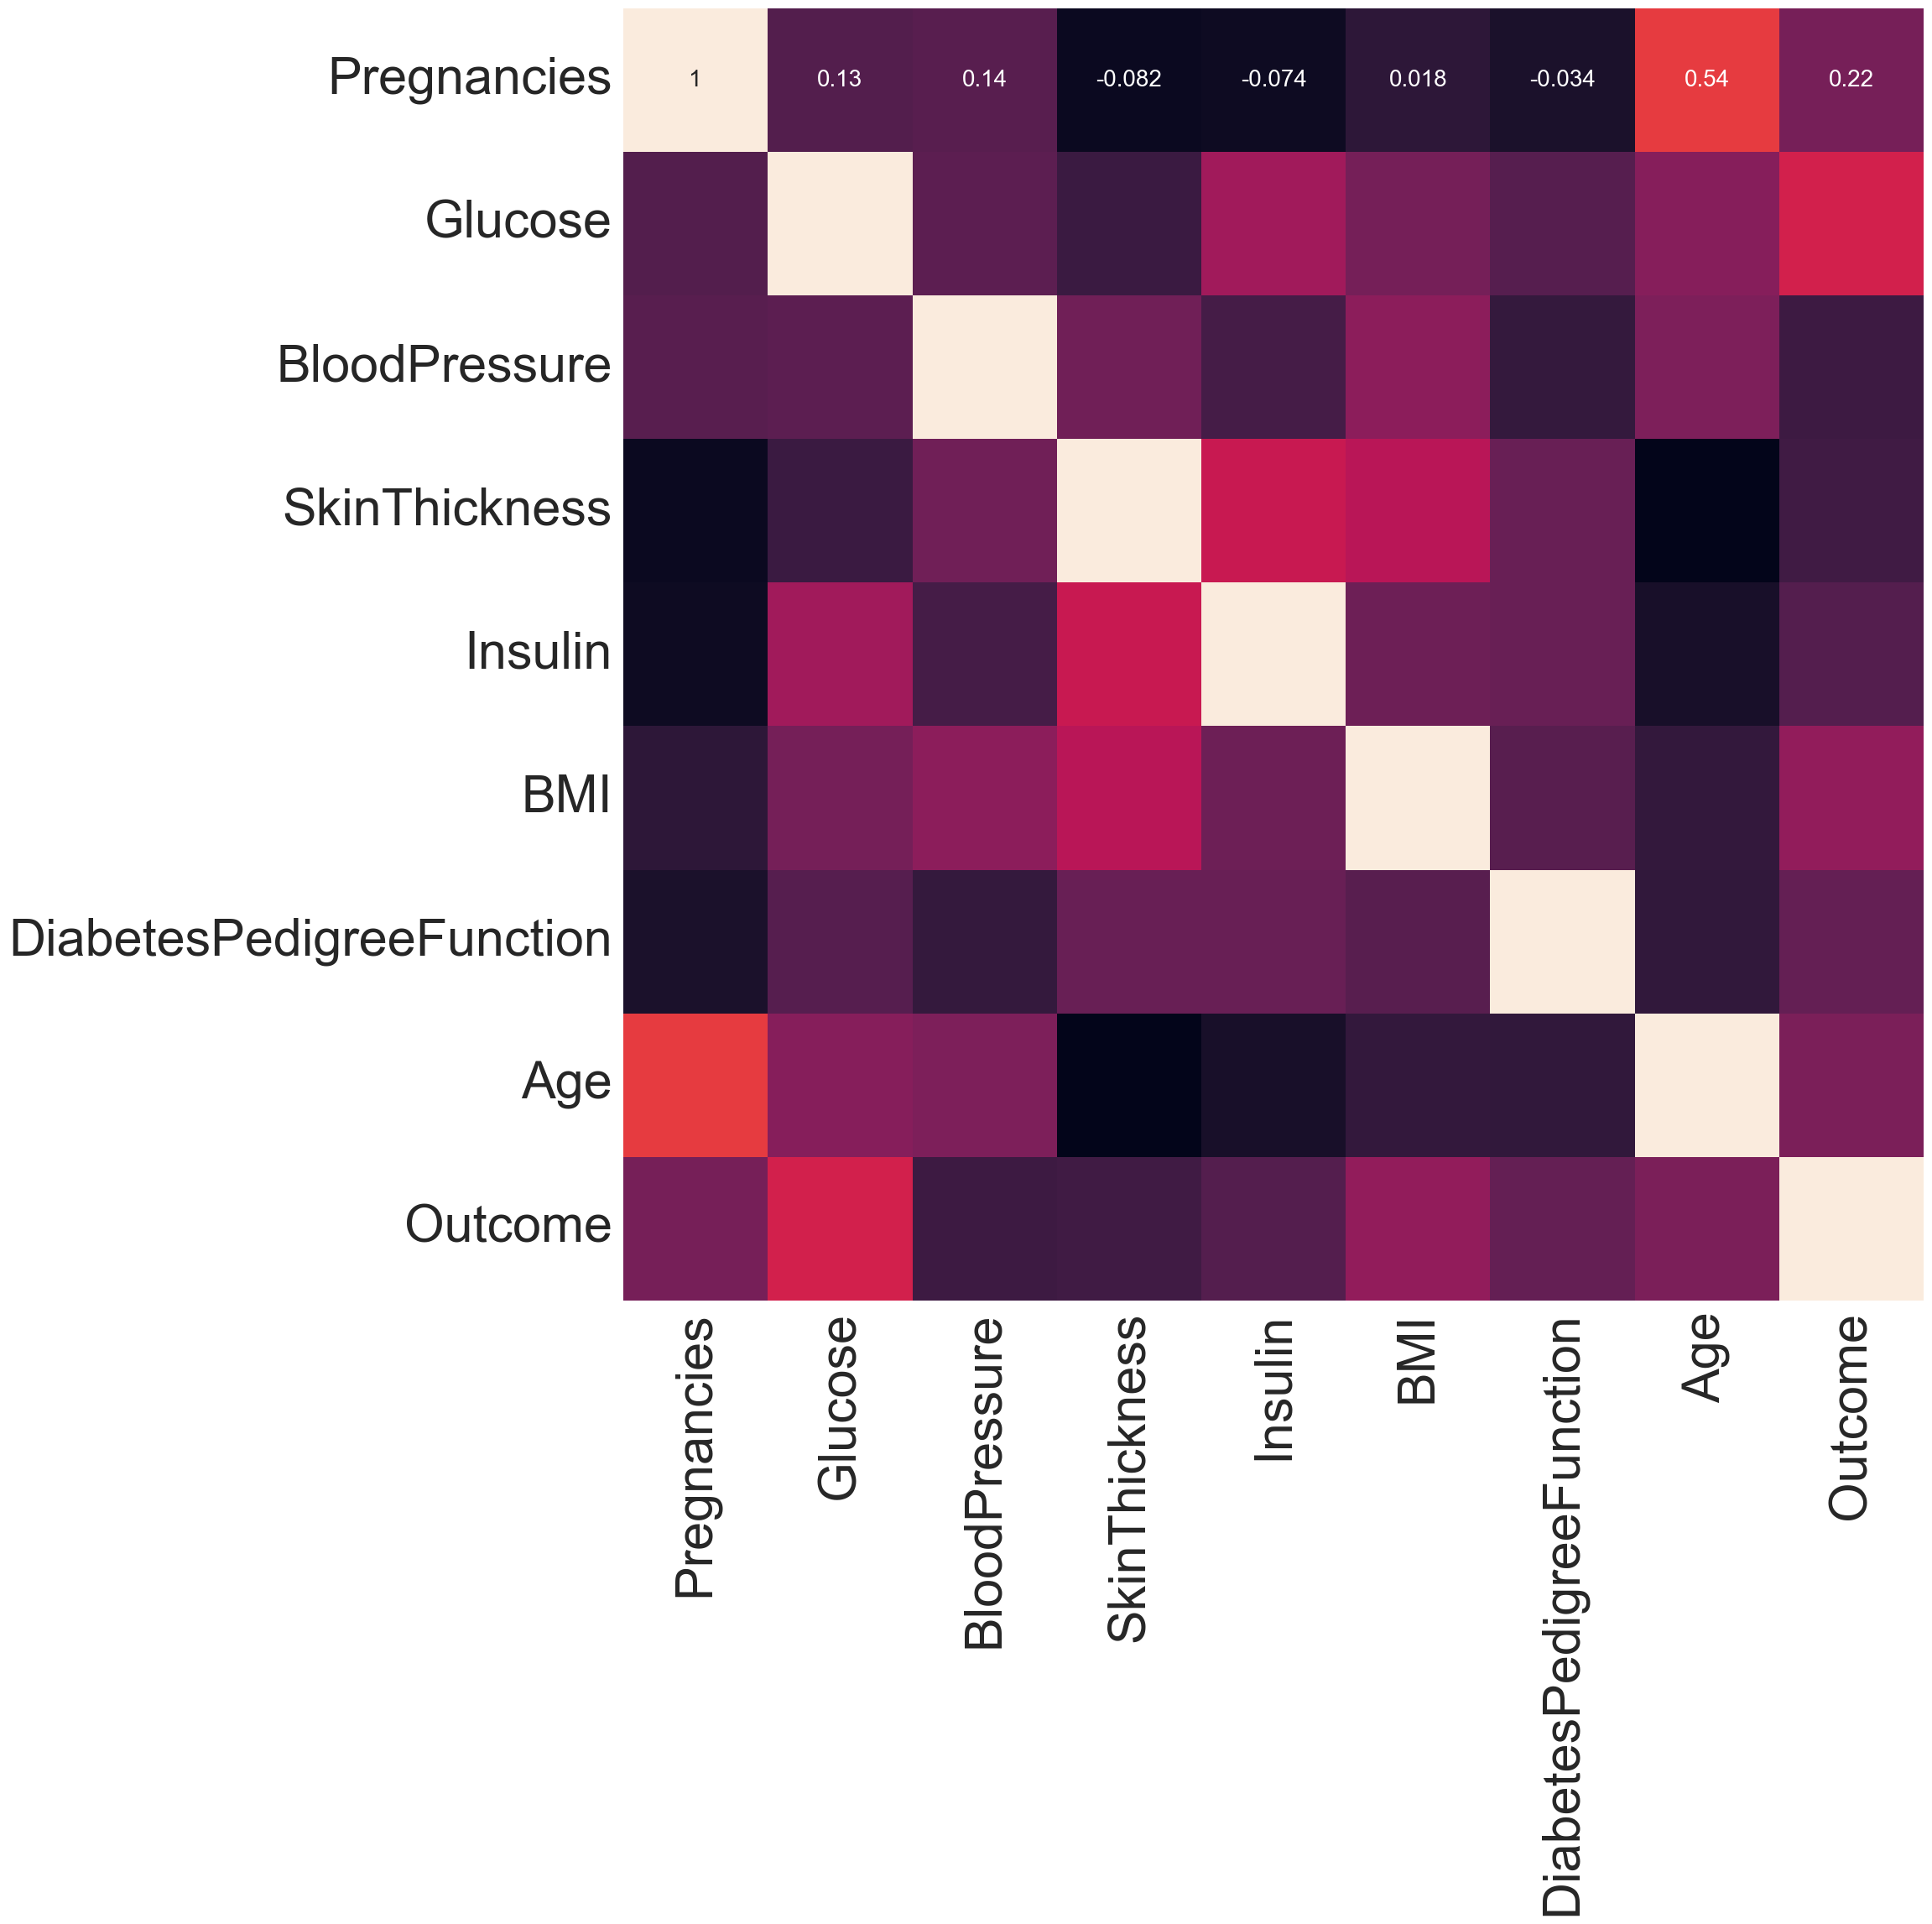

In [17]:
df_corr = df.corr()

plt.figure(figsize=(20,20))
sns.set(font_scale=4)
sns.heatmap(df_corr, annot=True, cbar=False, annot_kws={"size": 20})
plt.show()

In [19]:
#데이터와 레이블 분할
df_train = df.drop('Outcome', axis=1)
df_train.head()

df_label = df['Outcome']
df_label.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [20]:
#훈련데이터와 테스트 데이터로 분할
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df_train, df_label, test_size=0.2, shuffle=True, random_state=12)

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(x_train, y_train)
LR_preds = model.predict(x_test)

print('MSE', mean_squared_error(ly_preds, y_test))

MSE 0.16392743774224444


In [25]:
# 2) 결정트리회귀
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(x_train, y_train)

DT_preds = model.predict(x_test)
print("MSE", mean_squared_error(DT_preds, y_test))

MSE 0.22727272727272727


In [27]:
# 3) RandomForest
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(x_train, y_train)

RF_preds = model.predict(x_test)
print("MSE", mean_squared_error(RF_preds, y_test))

MSE 0.15531168831168832


In [29]:
from sklearn.svm import SVR

model = SVR(kernel='linear')
model.fit(x_train, y_train)

SVR_preds = model.predict(x_test)
print("MSE", mean_squared_error(SVR_preds, y_test))

MSE 0.1770070174339976
